In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('GnBu_d')

In [43]:
titanic = pd.read_csv("C:\\Users\\CO-225\\Documents\\ciencia de datos\\Datos\\titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Estandarizacion

Z = (x - mean(x))/sd()

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
from sklearn.preprocessing import StandardScaler 

In [15]:
scaler = StandardScaler()
scaler.fit(titanic[["Fare","Age"]])
titanic[["Fare","Age"]] = pd.DataFrame(scaler.transform[["Fare","Age"]])

TypeError: 'method' object is not subscriptable

In [27]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
titanic.Fare

In [29]:
from sklearn.preprocessing import MinMaxScaler 

In [30]:
scaler2 = MinMaxScaler()
scaler2.fit(titanic[["Fare","Age"]])
titanic[["Fare","Age"]] = pd.DataFrame(scaler2.transform(titanic[["Fare","Age"]]))

In [31]:
titanic.Fare.describe()

count    891.000000
mean       0.062858
std        0.096995
min        0.000000
25%        0.015440
50%        0.028213
75%        0.060508
max        1.000000
Name: Fare, dtype: float64

# Transformaciones no Lineales

## Transformacion Quantil

In [35]:
from sklearn.preprocessing import QuantileTransformer 
scaler = QuantileTransformer(output_distribution="normal")
scaler2.fit(titanic[["Fare","Age"]])
titanic[["Fare2","Age2"]] = pd.DataFrame(scaler2.transform(titanic[["Fare","Age"]]))

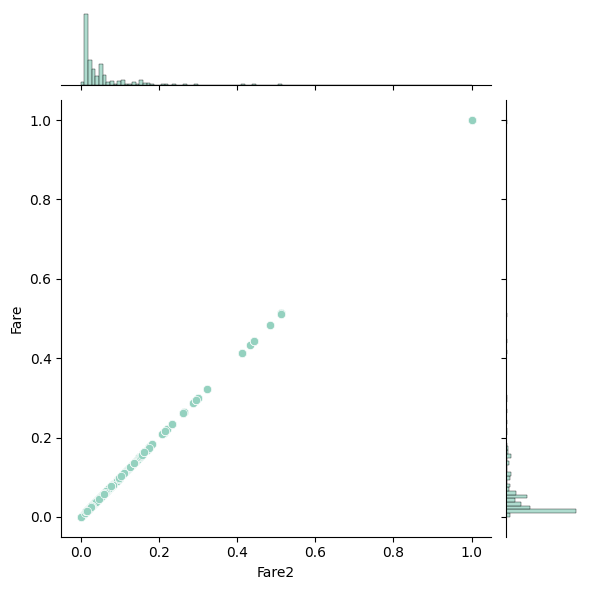

In [38]:
sns.jointplot(x="Fare2",y="Fare",data = titanic)


## Transformaciones de potencia

In [41]:
from sklearn.preprocessing import PowerTransformer 
scaler = PowerTransformer()
scaler2.fit(titanic[["Fare","Age"]])
titanic[["Fare2","Age2"]] = pd.DataFrame(scaler2.transform(titanic[["Fare","Age"]]))

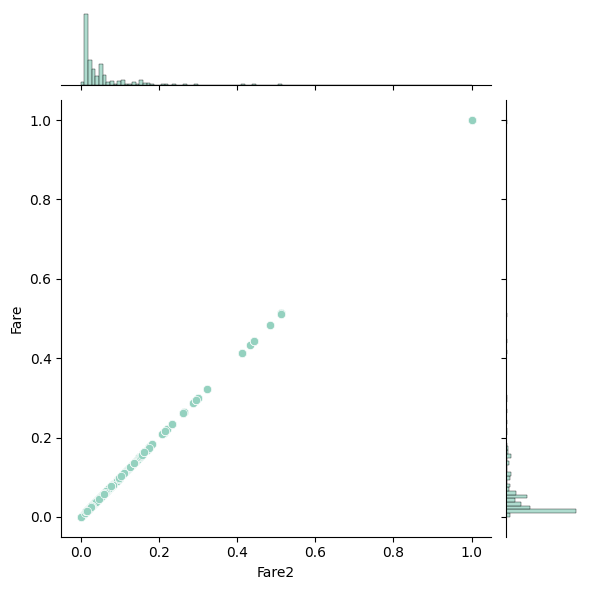

In [42]:
sns.jointplot(x="Fare2",y="Fare",data = titanic)

In [49]:
# titanic.Cabin
# titanic.Sex
# titanic.Embarked

categ = ["Sex","Cabin","Embarked"]
titanic = pd.get_dummies(titanic, columns = categ, drop_first=False)


In [50]:
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_female',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=161)

In [51]:
titanic.shape

(891, 161)

# Valores Ausentes

In [62]:
titanic = pd.read_csv("C:\\Users\\CO-225\\Documents\\ciencia de datos\\Datos\\titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Ver procentaje de valores ausentes 


In [53]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp.fit(titanic[["Age"]])
titanic[["AgeImp"]] = pd.DataFrame(imp.transform(titanic[["Age"]]))

In [54]:
titanic.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
AgeImp         0.000000
dtype: float64

In [56]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp.fit(titanic[["Cabin"]])
titanic[["CabinImp"]] = pd.DataFrame(imp.transform(titanic[["Cabin"]]))

In [58]:
titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [59]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp.fit(titanic[["Embarked"]])
titanic[["EmbarkedImp"]] = pd.DataFrame(imp.transform(titanic[["Embarked"]]))

In [60]:
titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

# Imputacion Multivariada

## MICE Multivariate Imputation by Chained Equations

In [64]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [67]:
imp = IterativeImputer(max_iter=100, random_state=0)
imp.fit(titanic[["Age"]])
titanic[["AgeImp"]] = pd.DataFrame(imp.transform(titanic[["Age"]]))

In [70]:
titanic[["Age","AgeImp"]].describe()

,Age,AgeImp
count,714.000000,891.000000
mean,29.699118,29.699118
std,14.526497,13.002015
min,0.420000,0.420000
25%,20.125000,22.000000
50%,28.000000,29.699118
75%,38.000000,35.000000
max,80.000000,80.000000


# Imputacion por KNN

In [71]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=3)
imp.fit(titanic[["Age"]])
titanic[["AgeImp"]] = pd.DataFrame(imp.transform(titanic[["Age"]]))

In [72]:
titanic[["Age","AgeImp"]].describe()

,Age,AgeImp
count,714.000000,891.000000
mean,29.699118,29.699118
std,14.526497,13.002015
min,0.420000,0.420000
25%,20.125000,22.000000
50%,28.000000,29.699118
75%,38.000000,35.000000
max,80.000000,80.000000


# Reduccción de dimensiones

### identificadores
### fechas (sirven las distancias de tiempo)
### valores muy ausentes
### numeros de telefono
### variables que tengan varianza cercana a cero
### variables altamante correlacionadas (colinealidad)

## PCA - Analisis de componentes Principales 

In [73]:
titanic = pd.read_csv("C:\\Users\\CO-225\\Documents\\ciencia de datos\\Datos\\titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
##Tomar las variables numericas
scaler = MinMaxScaler()
scaler.fit(x["PClass","Age","SibSp","Parch","Fare"])